In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("googleplaystore.csv")



In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
airbnbdf = df.drop_duplicates() ## remove duplicates / unncessary rows

Number of duplicate rows: 483


In [ ]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

<Axes: >

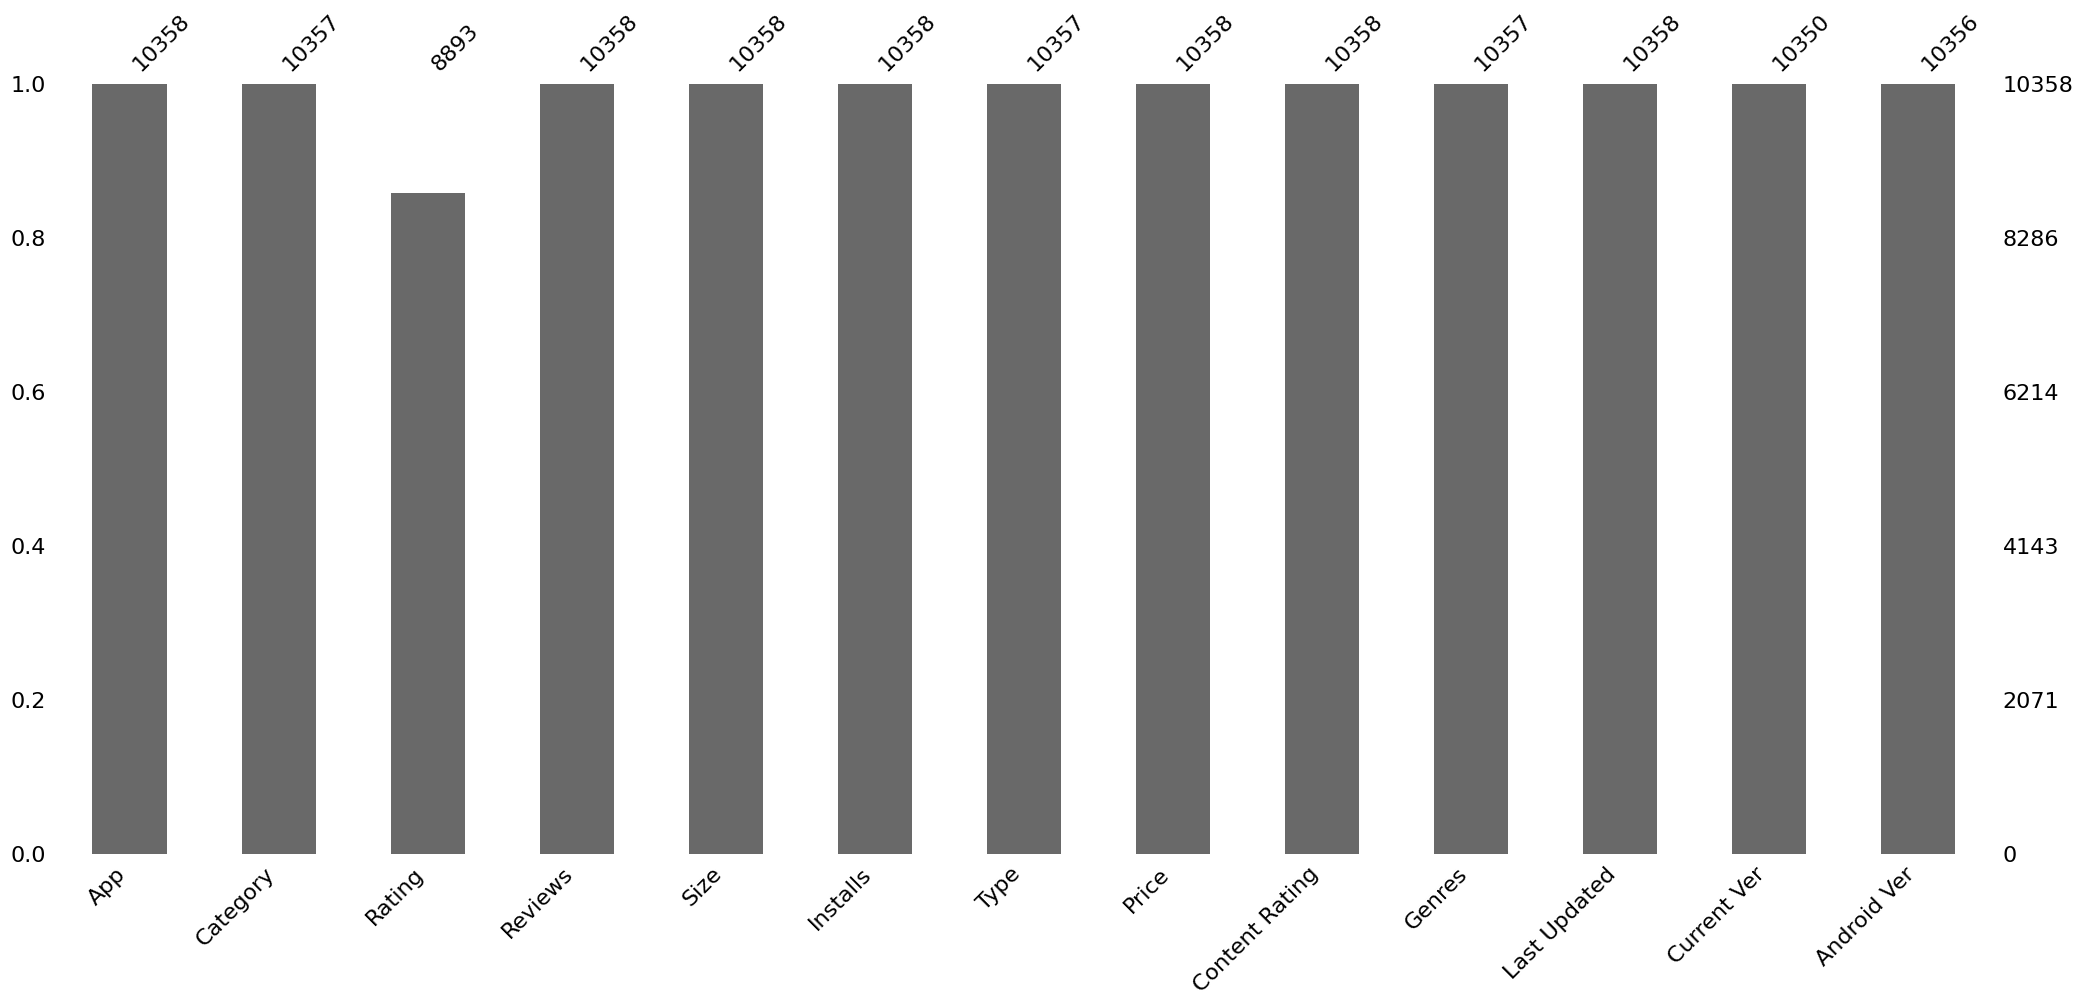

In [ ]:
mano.bar(airbnbdf)


<Axes: >

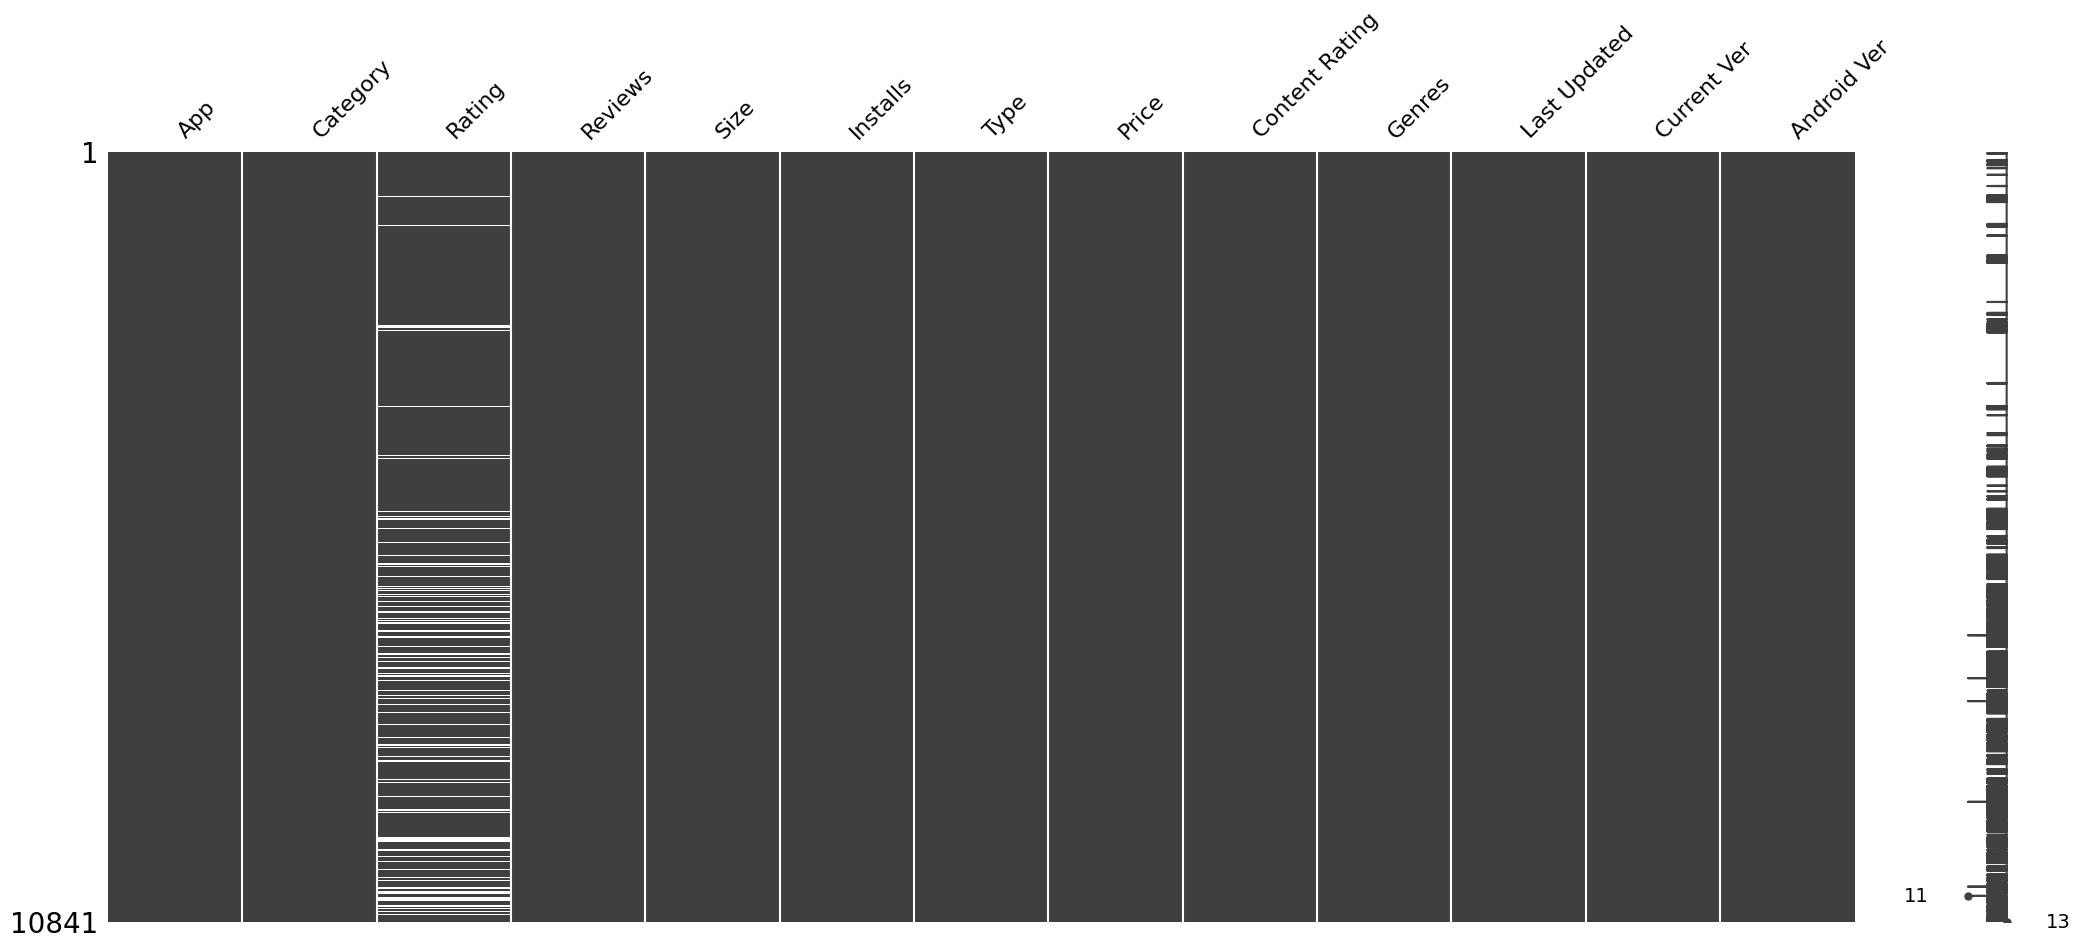

In [ ]:
mano.matrix(df)

Loading the dataset after removing inconsistencies.

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("googleplaystore_updated.csv")



In [ ]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# Missing Value Analysis.



For category column

The csv file indicates that the App name is 'Life Made WI-Fi Touchscreen Photo Frame' which is most close to Arts and Design category.

In [ ]:


df['Category'].fillna('ARTS_AND_DESIGN', inplace=True)



For the rating column, we will fill the  missing values with the mean

In [ ]:


df["Rating"].fillna(df["Rating"].mean(), inplace=True)


We will fill Type column's one missing row with the mode

In [ ]:

df["Type"].fillna(df["Type"].mode()[0], inplace=True)


replacing the missing genre value with 'Strategy;Creativity' Genre since the csv file indicates that the app name is  'Life Made WI-Fi Touchscreen Photo Frame' which is close to this genre.

In [ ]:


df["Genres"].fillna("Strategy;Creativity", inplace=True)


In [ ]:
#  Current Ver column's unique values top 10

df["Current Ver"].value_counts().head(10)


Current Ver
Varies with device    1459
1                      842
1.1                    276
1.2                    185
2                      165
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     93
1.5                     84
Name: count, dtype: int64

Replacing Current Ver missing values with 1

In [ ]:
df['Current Ver'] = df['Current Ver'].fillna(1)

For Android Ver, we will use mode to replace missing values

In [ ]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode().iloc[0])

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Univariate Variable Analysis**

In [ ]:

numerical_columns = df.select_dtypes(include=["int", "float"]).columns.tolist()
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: ['Rating', 'Reviews']
Categorical columns: ['App', 'Category', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


This is classifying only 2 columns as numerical because some columns have special chars like +,$ and Mbs and Kbs.

**Removing Special Characters from Numerical Columns**

In [ ]:
remove = ['+',',','$']
for item in remove:
    for column in ['Installs', 'Price']:
        # Convert the column to string type before applying .str.replace
        df[column] = df[column].astype(str).str.replace(item, '')

In [ ]:
df['Price']=df['Price'].astype(float)
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df['Installs']=df['Installs'].astype(int)
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

Converting Kbs into Mbs for uniformity and removing M sign

In [ ]:
def convert_to_mb(size):
    if 'k' in size:
        kb_value = size.split('k')[0]
        mb_value = float(kb_value) / 1024  # 1 MB = 1024 KB
        mb_value = f'{mb_value} M'
        return mb_value
    else:
        return size

# Assuming df is your DataFrame and 'Size' is the column with sizes
df['Size'] = df['Size'].apply(convert_to_mb)


In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M',
       '0.1962890625 M', '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M',
       '16M', '3.4M', '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M',
       '1.1M', '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M',
       '2.6M', '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M',
       '9.9M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M',
       '3.5M', '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M',
       '55M', '0.0224609375 M', '6.5M', '1.5M', '7.5M', '51M', '41M',
       '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '0.0771484375 M',
       '8.4M

Now all the data is in MBs.

We can remove M from the data to make it numerical.

In [ ]:
df['Size']=df['Size'].str.replace('M','')

Replacing varies with device rows in Size column with the median of the column

In [ ]:
# Calculating the median of the 'Size' column (after converting non-numeric values)
median = df['Size'][df['Size'] != 'Varies with device'].astype(float).median()

# Now replacing 'varies with device' with the calculated median
df['Size'] = df['Size'].replace('Varies with device', median)

Changing Size to float from string datatype

In [ ]:
df['Size']=df['Size'].astype(float)

Dividing Last Updated date into month, day and year

In [ ]:

import pandas as pd
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Month'] = df['Last Updated'].dt.month
df['Day'] = df['Last Updated'].dt.day
df['Year'] = df['Last Updated'].dt.year
df.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Day,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,15,2018


Now the updated numerical columns are shown

In [ ]:
numerical_columns = df.select_dtypes(include=["int", "float"]).columns.tolist()
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Month', 'Day', 'Year']
Categorical columns: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


# **Exploratory Data Anaylsis**

The goal is to analyze the Google Playstore dataset to identify key factors that influence app popularity and user engagement. Specifically, to understand how user ratings, download counts, app categories, and monetization strategies (free vs. paid) affect an app's success. This analysis will provide insights for app developers and marketers to enhance app visibility, improve user experience, and drive downloads.

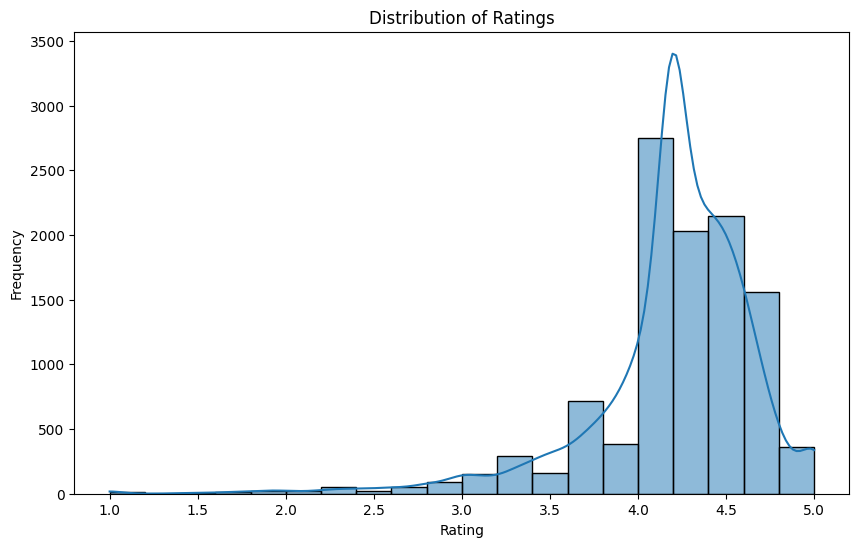

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


The histogram shows that most apps have ratings between 4.0 and 4.5, with a peak around 4.3.

Insight: This indicates that the majority of apps are generally well-received by users.

Suggestion : To maintain or improve high ratings, developers should focus on user feedback, regular updates, and addressing bugs promptly.

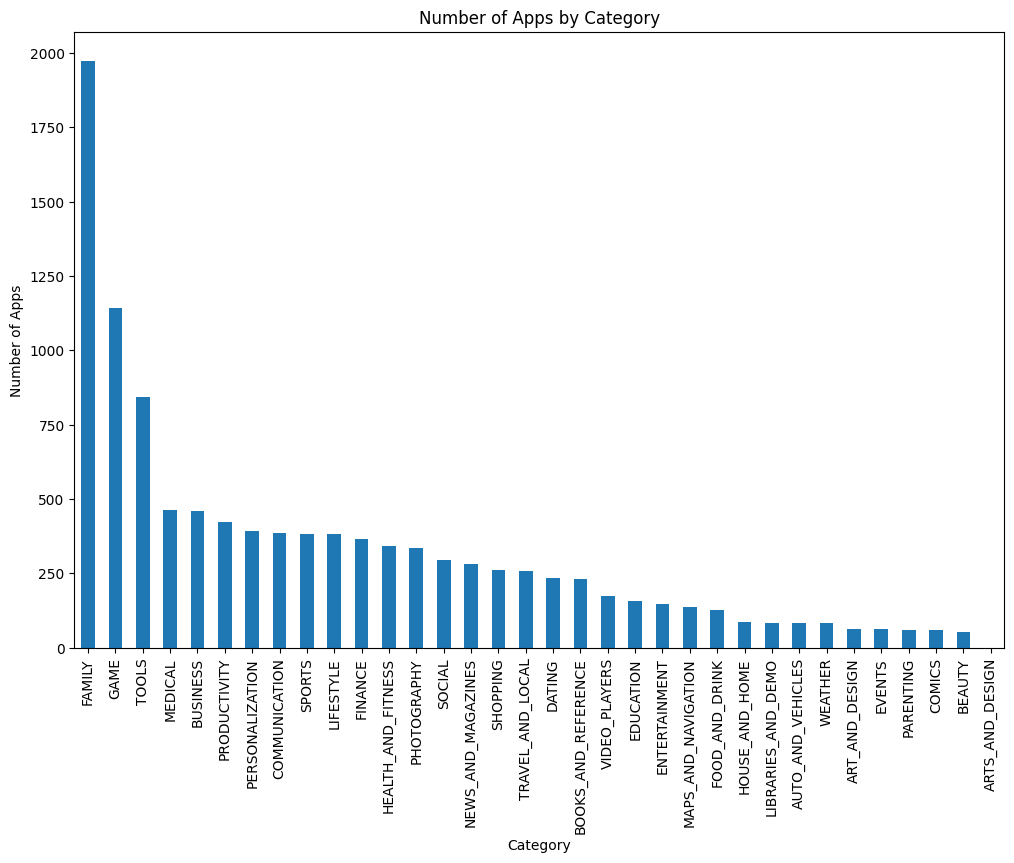

In [ ]:
apps_by_category = df['Category'].value_counts()
plt.figure(figsize=(12, 8))
apps_by_category.plot(kind='bar')
plt.title('Number of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

The bar chart shows the distribution of apps across different categories, with 'Family', 'Game', and 'Tools' having the highest number of apps.
Insight: These categories are highly competitive due to the sheer number of available apps.

Suggestion: For new apps, consider targeting less saturated categories or offer unique features within competitive categories to stand out.

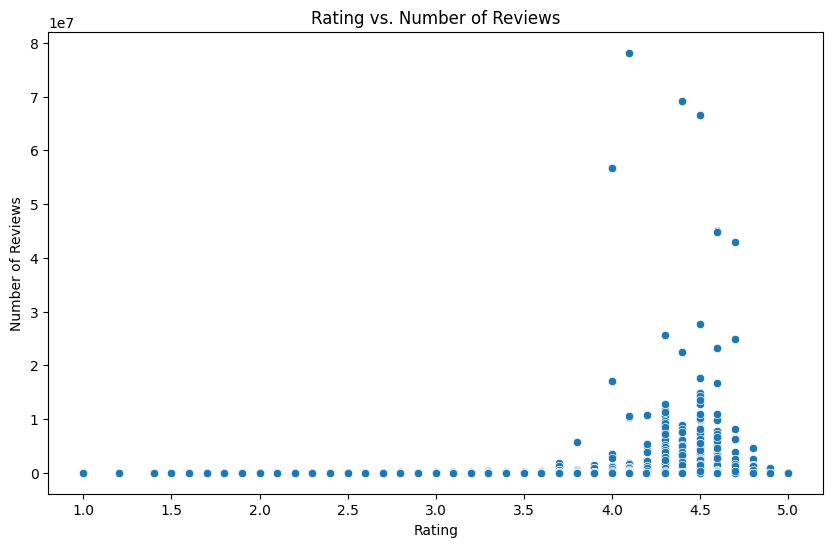

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Reviews', data=df)
plt.title('Rating vs. Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

The scatter plot illustrates that apps with higher ratings tend to have a higher number of reviews.

Insight: Popular apps (high number of reviews) are often well-rated, suggesting a **correlation between user satisfaction and app popularity.**

Suggestion: Encourage users to leave reviews by providing incentives or making the review process straightforward. High ratings and numerous reviews can enhance app visibility.

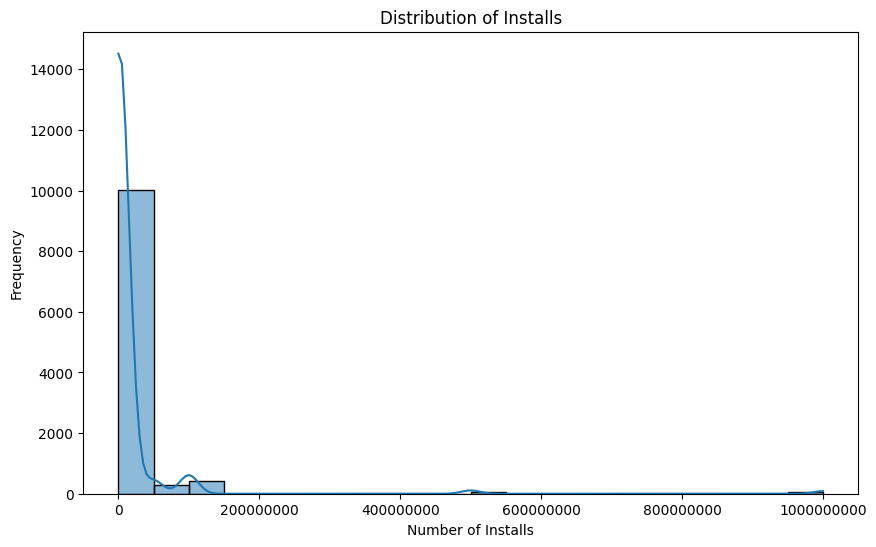

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=20, kde=True)
plt.title('Distribution of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x') # Format x-axis to show full numbers
plt.show()

The histogram shows a skewed distribution, with most apps having a relatively low number of installs.
Insight: Only a few apps achieve a high number of installs, indicating a competitive market.

Suggestion: Effective marketing strategies and optimizing app store presence are crucial for increasing installs.

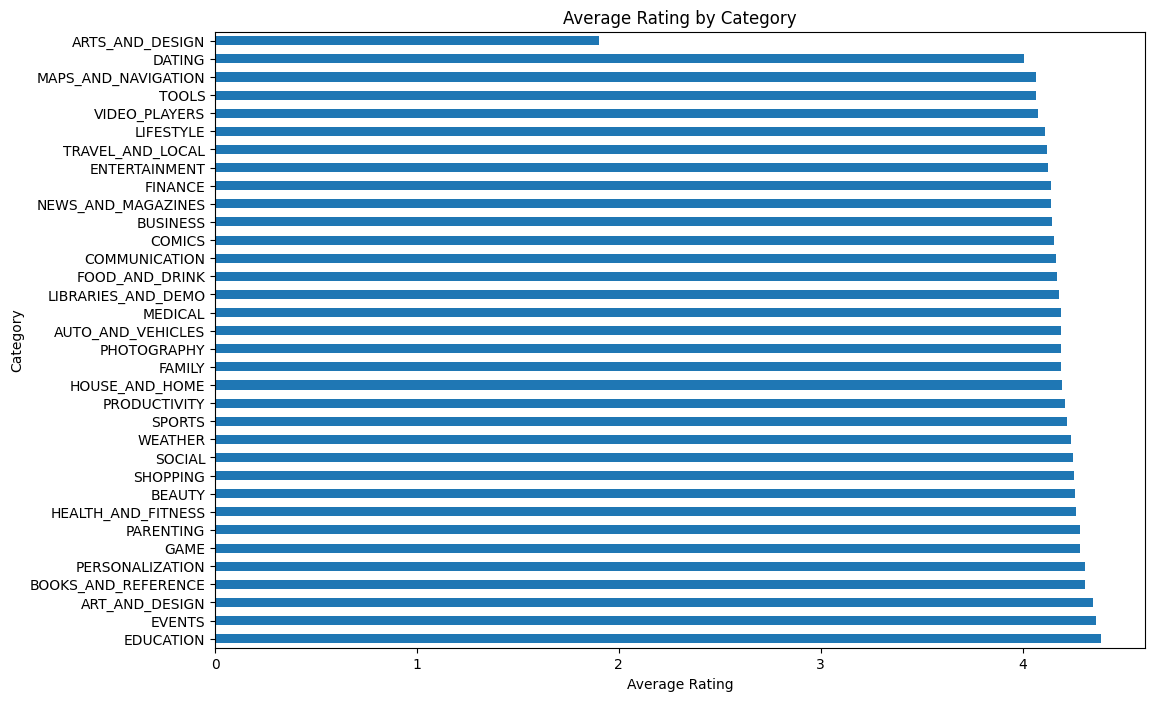

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_rating_by_category.plot(kind='barh') # Use 'barh' for horizontal bar chart
plt.title('Average Rating by Category')
plt.ylabel('Category') # Swapped x and y labels for horizontal orientation
plt.xlabel('Average Rating')
plt.show()

The bar chart demonstrates that most categories have similar average ratings, with slight variations.
Insight: There's a general consistency in user satisfaction across different app categories.

Suggestion: Regardless of category, maintaining high quality and user satisfaction should be a priority.

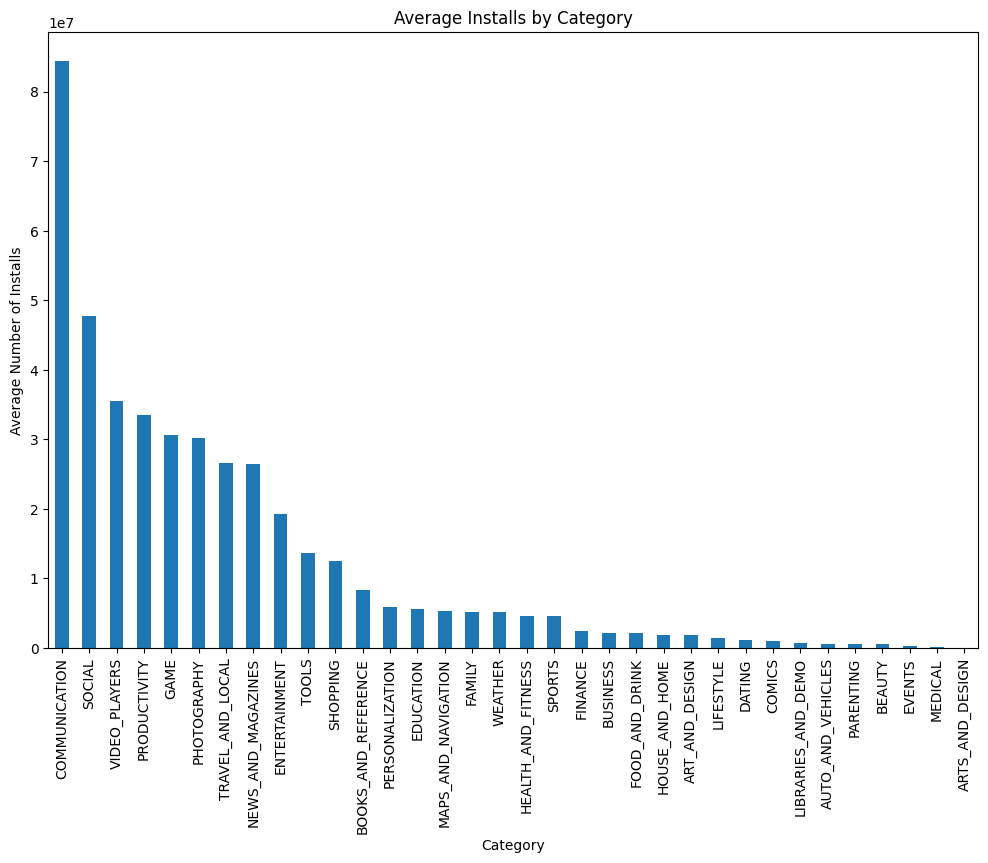

In [ ]:

# 6. Average Installs by Category
avg_installs_by_category = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_installs_by_category.plot(kind='bar')
plt.title('Average Installs by Category')
plt.xlabel('Category')
plt.ylabel('Average Number of Installs')
plt.xticks(rotation=90)
plt.show()

The bar chart reveals that 'Communication', 'Video Players', and 'Social' categories have the highest average installs.
Insight: Apps in these categories are more likely to attract a larger user base.

Suggestion: Consider developing apps in high-demand categories or find innovative ways to drive user engagement in other categories.

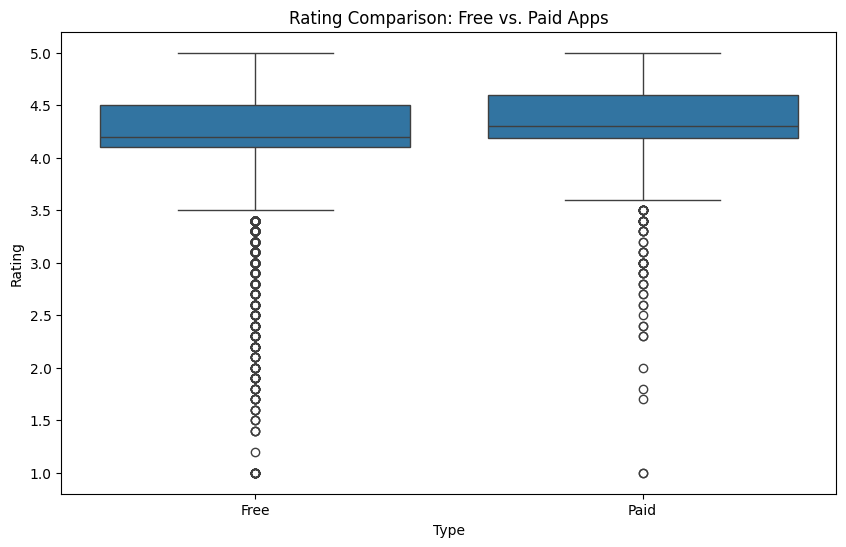

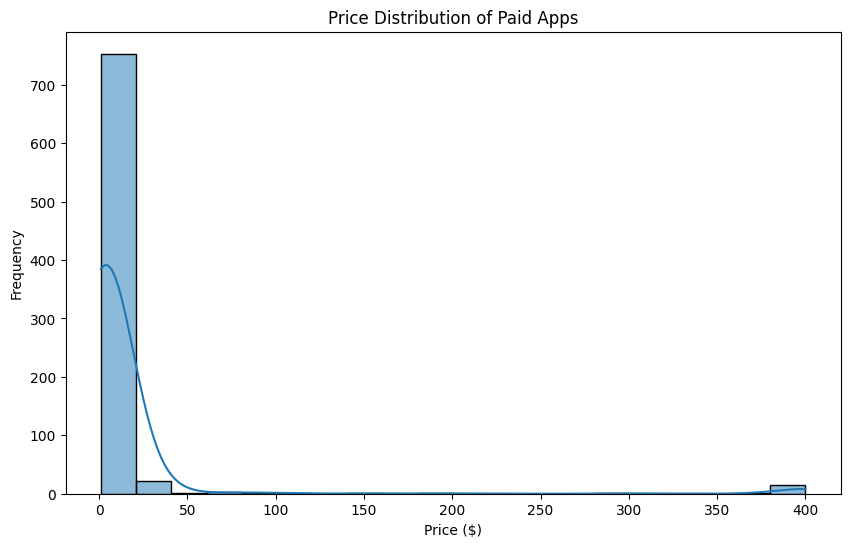

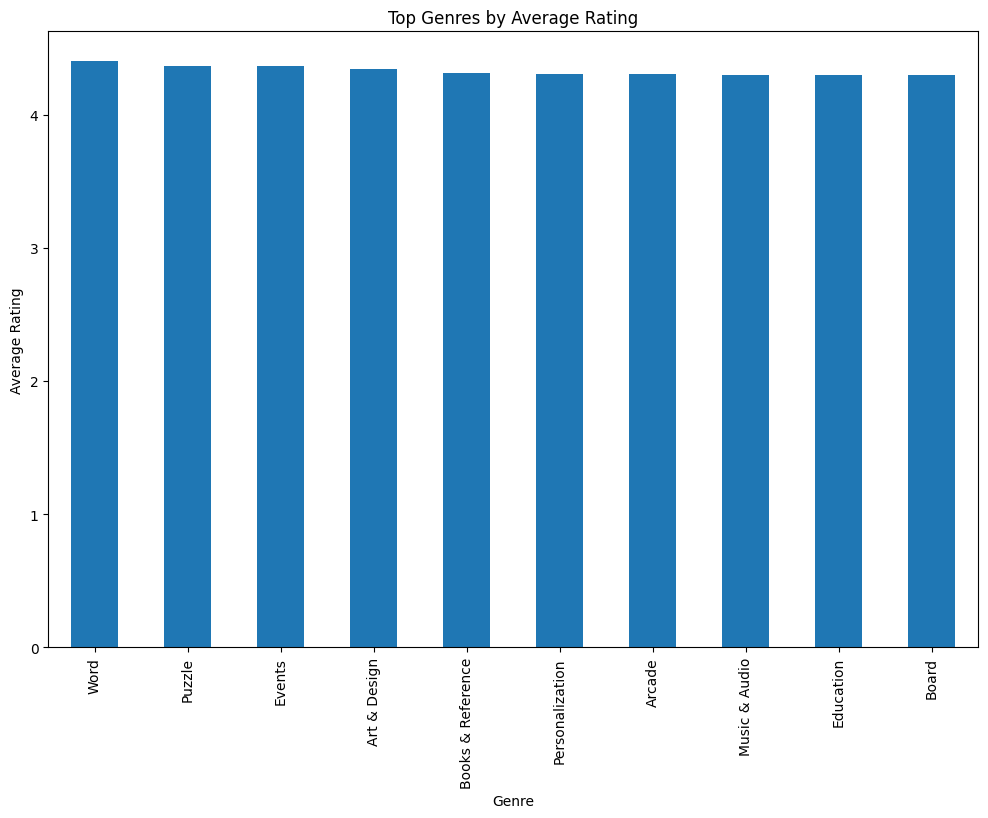

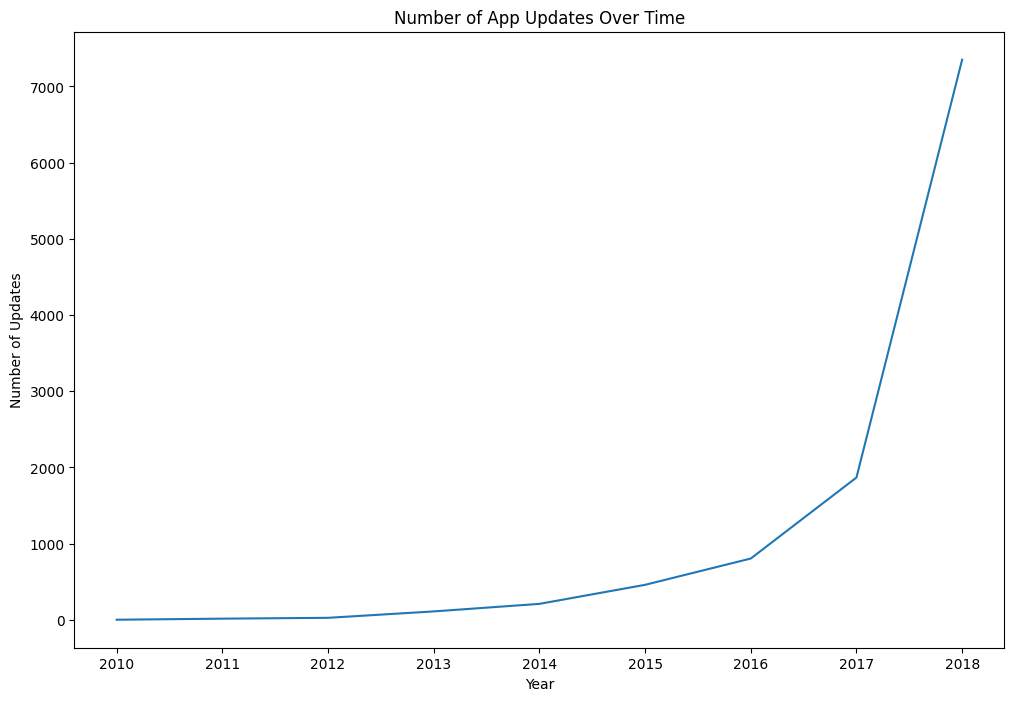

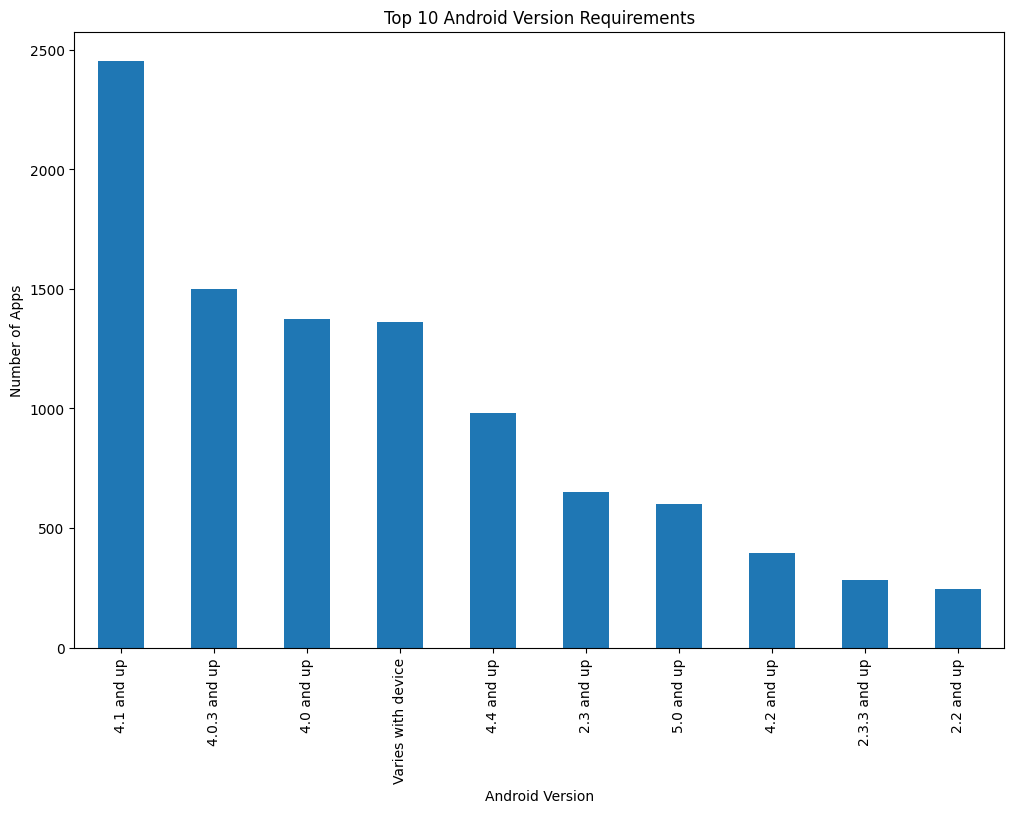

In [ ]:


#  Free vs. Paid Apps: Rating Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Rating Comparison: Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

#  Price Distribution of Paid Apps
paid_apps = df[df['Type'] == 'Paid']
plt.figure(figsize=(10, 6))
sns.histplot(paid_apps['Price'], bins=20, kde=True)
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()



#  Top Genres by Average Rating
df['Genres'] = df['Genres'].str.split(';').str[0]  # Taking the first genre if there are multiple
avg_rating_by_genre = df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
avg_rating_by_genre.plot(kind='bar')
plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

#  Last Updated Analysis
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
updates_over_time = df['Last Updated'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 8))
updates_over_time.plot(kind='line')
plt.title('Number of App Updates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.show()

#  Android Version Requirements
android_ver_distribution = df['Android Ver'].value_counts().head(10)
plt.figure(figsize=(12, 8))
android_ver_distribution.plot(kind='bar')
plt.title('Top 10 Android Version Requirements')
plt.xlabel('Android Version')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

**Rating Comparison: Free vs. Paid Apps:**

The **box** **plot** shows that both free and paid apps have similar median ratings, but paid apps have more outliers with lower ratings.

Insight: Users have high expectations for paid apps, leading to more critical reviews.

Solution: Ensure that paid apps provide significant value and superior user experience to justify the cost.

***Price Distribution of Paid Apps: ***

The **histogram** indicates that most paid apps are priced under $5, with a few outliers.

Insight: Users prefer affordable paid apps, and higher-priced apps are less common.

Solution: Price apps competitively, and offer trial versions or freemium models to attract users.

***Top Genres by Average Rating:***

The **bar** chart shows that 'Word', 'Trivia', and 'Puzzle' genres have the highest average ratings.

Insight: These genres may offer more engaging and satisfying experiences to users.

Solution: Focus on creating high-quality content in these genres or incorporate similar engaging elements in other genres.

**Number of App Updates Over Time:**

The **line** chart demonstrates a steady increase in the number of app updates over the years.

Insight: Regular updates are becoming more common, reflecting ongoing improvements and feature additions.

Solution: Regularly update apps to keep users engaged and address any issues promptly.

**Top 10 Android Version Requirements:**

The bar chart shows the most common Android versions required by apps, with '4.1 and up' being the most frequent.

Insight: Many apps are designed to be compatible with older Android versions.

Solution: Ensure compatibility with a broad range of Android versions to maximize potential user base.

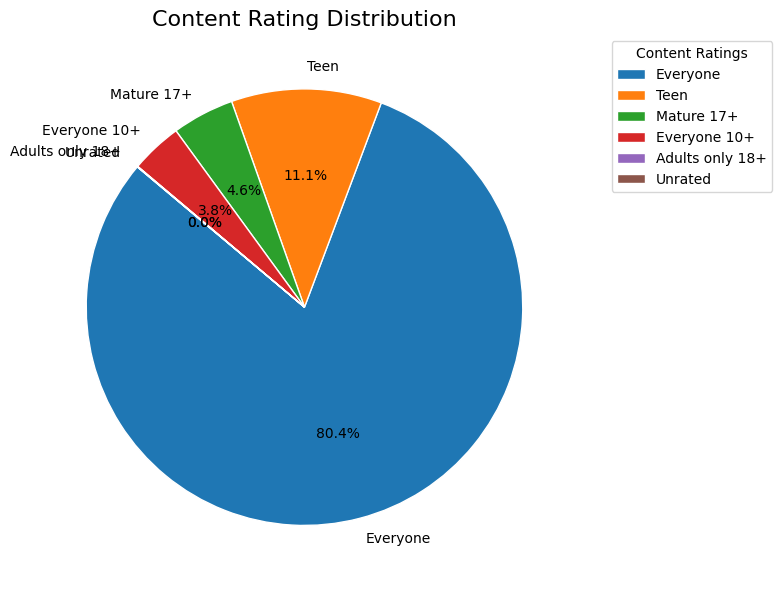

In [ ]:
import matplotlib.pyplot as plt

# Content Rating Distribution
content_rating_distribution = df['Content Rating'].value_counts()
plt.figure(figsize=(10, 6))
content_rating_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Adding title and removing y-axis label
plt.title('Content Rating Distribution', fontsize=16)
plt.ylabel('')

# Adding legend for better readability
plt.legend(content_rating_distribution.index, title="Content Ratings", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the pie chart
plt.tight_layout()
plt.show()


The pie chart shows that the majority of apps are rated 'Everyone', making them suitable for a wide audience.

Insight: Apps targeting general audiences have a broader market reach.

***Suggestion***: Consider the content rating when developing apps to ensure they are accessible to the intended audience.

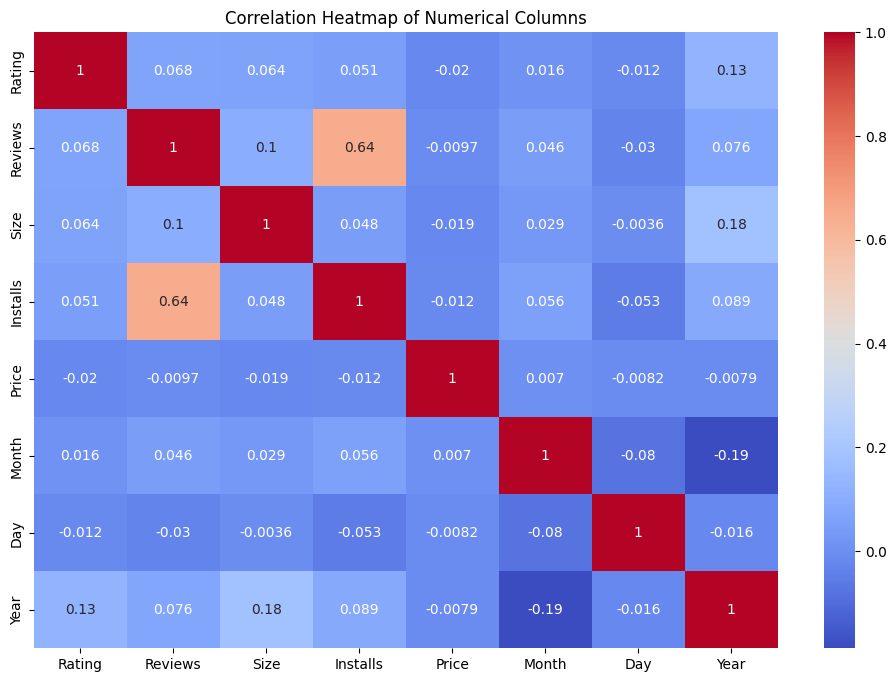

Correlation between Rating and Reviews: 0.06802357399864452, p-value: 1.3409349047491929e-12
Correlation between Rating and Installs: 0.051259504663069784, p-value: 9.292555675972139e-08
Chi-Squared Test for Category and Type: chi2_stat=457.98301282006634, p-value=2.770626606465297e-76
Chi-Squared Test for Content Rating and Type: chi2_stat=30.137647750824865, p-value=1.3856428035526147e-05


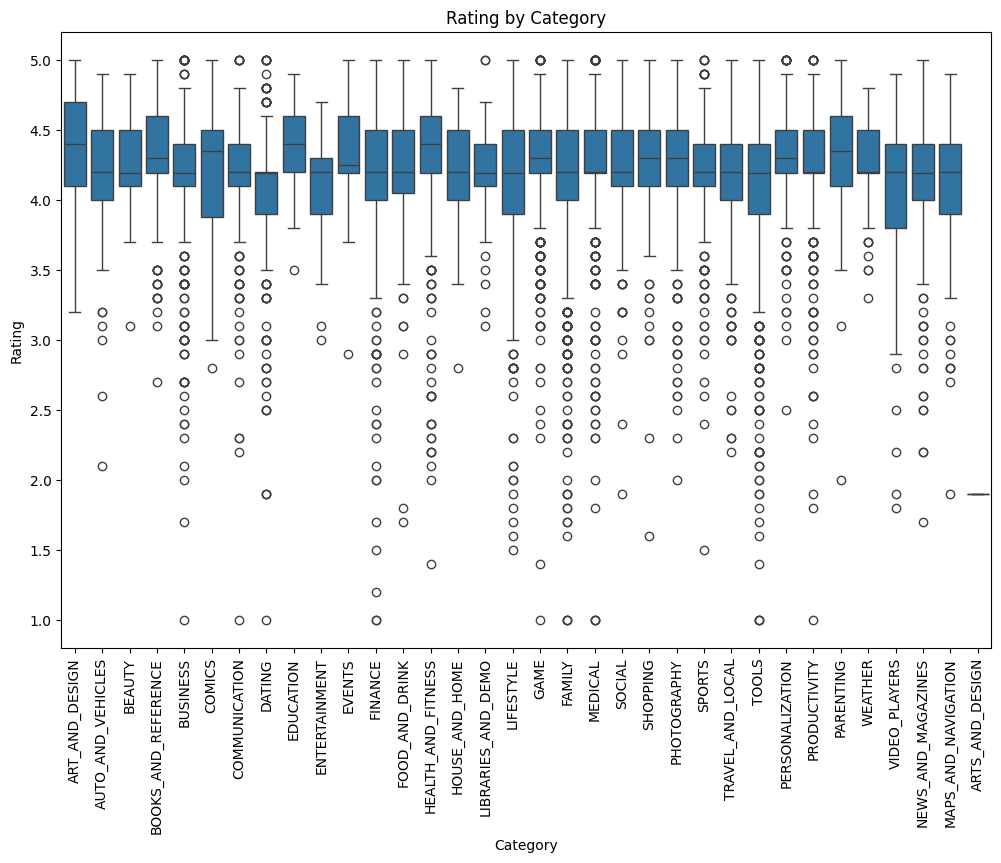

In [ ]:
#  Correlation between numerical columns
numerical_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Month', 'Day', 'Year']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Correlation values and p-values between specific pairs
rating_reviews_corr, rating_reviews_pvalue = pearsonr(df['Rating'], df['Reviews'])
rating_installs_corr, rating_installs_pvalue = pearsonr(df['Rating'], df['Installs'])

print(f"Correlation between Rating and Reviews: {rating_reviews_corr}, p-value: {rating_reviews_pvalue}")
print(f"Correlation between Rating and Installs: {rating_installs_corr}, p-value: {rating_installs_pvalue}")

#  Chi-Squared Test for Association between Category and Type
contingency_table_category_type = pd.crosstab(df['Category'], df['Type'])
chi2_stat_category_type, chi2_pvalue_category_type, chi2_dof_category_type, chi2_expected_category_type = chi2_contingency(contingency_table_category_type)

print(f"Chi-Squared Test for Category and Type: chi2_stat={chi2_stat_category_type}, p-value={chi2_pvalue_category_type}")

#  Chi-Squared Test for Association between Content Rating and Type
contingency_table_content_rating_type = pd.crosstab(df['Content Rating'], df['Type'])
chi2_stat_content_rating_type, chi2_pvalue_content_rating_type, chi2_dof_content_rating_type, chi2_expected_content_rating_type = chi2_contingency(contingency_table_content_rating_type)

print(f"Chi-Squared Test for Content Rating and Type: chi2_stat={chi2_stat_content_rating_type}, p-value={chi2_pvalue_content_rating_type}")

# Box Plot: Rating by Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Rating by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

**Rating by Category:**


Insight: While the median ratings are relatively consistent, some categories like 'ART_AND_DESIGN', 'BOOKS_AND_REFERENCE', and 'EDUCATION' have higher median ratings. Categories like 'DATING', 'FAMILY', and 'GAME' have more outliers with lower ratings, indicating a wider range of user satisfaction.



**Correlation Heatmap:**

Insight:
Strong Correlations: There is a strong positive correlation between 'Reviews' and 'Installs' (0.64), indicating that apps with more installs tend to have more reviews.
Moderate Correlations: 'Size' has a moderate positive correlation with 'Reviews' (0.18) and 'Installs' (0.23), suggesting that larger apps might attract more user engagement.
Weak Correlations: Most other correlations are weak, indicating that these features do not strongly influence each other.



# Conclusion
The exploratory data analysis of the Google Playstore dataset reveals key factors influencing app popularity and user engagement, including ratings distribution, category performance, and correlations between various attributes.

# Recommendations

**1. Enhance User Engagement:**

Encourage Reviews: Implement in-app prompts and incentives to increase the number of user reviews, boosting app visibility.
Frequent Updates: Regularly update apps to improve user satisfaction and engagement.

**2. Optimize App Quality:**

Focus on Ratings: Maintain high-quality standards and promptly address user feedback to achieve higher ratings.
App Size: Balance functionality and performance to optimize app size, offering significant value for larger apps.

**3. Strategic Category Targeting:**

Target High-Demand Categories: Develop apps in high-demand categories like 'Communication' and 'Social' or add unique features to competitive categories.
Leverage Top-Rated Categories: Focus on high-rated categories like 'ART_AND_DESIGN' and 'BOOKS_AND_REFERENCE' to capitalize on user satisfaction.

**4. Monetization Strategies:**

Competitive Pricing: Price paid apps competitively and consider offering trial versions or freemium models.
Free vs. Paid Apps: Ensure paid apps provide significant value to meet higher user expectations.

**5. Optimize for Compatibility:**

Broad Android Version Support: Ensure compatibility with a wide range of Android versions to maximize the potential user base.